# Car Dataset Exploratory Data Analysis


Team member:
1. Andi Buwono (83051)
2. Akhmad Syakhlani (78221)


### Import libraries and constant

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# color scheme
plt.style.use('seaborn-dark')

# show inline
%matplotlib inline

# figure setting
fig_size = (25 / 1.5, 15 / 1.5)
dpi = 300
pd.set_option("max_colwidth", 999)


In [2]:
# read data
car_data_raw = pd.read_csv(('https://raw.githubusercontent.com/andibuwono/DSA/master/'
                            'homework/basic_statistic/car_dataset.csv'))

# pythonize column name
car_data_raw.columns = car_data_raw.columns.str.strip().str.lower().\
    str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Dataset wrangling and summaries

In [3]:
print("In the dataset of car_dataset.csv, it consists of %d rows and %d columns" % car_data_raw.shape)
print("It contains %d duplicated observation" % car_data_raw.duplicated().sum())
print("It contains %d not complete observation" % np.sum(car_data_raw.isnull().sum(axis=1) > 0))
print("Missing values of atrributes:")
print(car_data_raw.isnull().sum())

# drop duplicated data
car_data = car_data_raw.drop_duplicates()

In the dataset of car_dataset.csv, it consists of 11914 rows and 16 columns
It contains 715 duplicated observation
It contains 3830 not complete observation
Missing values of atrributes:
make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [4]:
print("Sample data:")
car_data.head()

Sample data:


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Describe all variable

In [5]:
# check numeric columns
car_data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
# check non numeric columns
for label, content in car_data.select_dtypes('object').items():
    print("-" * 60)
    print(label + " :")
    print("-" * 60)
    print(content.value_counts().head(10))

------------------------------------------------------------
make :
------------------------------------------------------------
Chevrolet     1083
Ford           825
Toyota         719
Volkswagen     568
Nissan         551
Dodge          529
GMC            482
Honda          433
Mazda          412
Cadillac       396
Name: make, dtype: int64
------------------------------------------------------------
model :
------------------------------------------------------------
Silverado 1500     156
Tundra             129
F-150              126
Sierra 1500         90
Frontier            76
Accord              74
Tacoma              71
Civic               66
Ram Pickup 1500     62
Corvette            60
Name: model, dtype: int64
------------------------------------------------------------
engine_fuel_type :
------------------------------------------------------------
regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recom

looks like **market_category** can contain multiple category, we need to tokenize this column

In [7]:
market_categories = set(car_data['market_category'].drop_duplicates().dropna().str.split(",").sum())

for cat in market_categories:
    col_name = cat.lower().replace(' ', '_') + "_market"
    car_data[col_name] = car_data['market_category'].str.find(cat) >= 0
    print("-" * 60)
    print(cat + " :")
    print("-" * 60)
    print(car_data[col_name].value_counts().head(10))

------------------------------------------------------------
Crossover :
------------------------------------------------------------
False    9205
True     1994
Name: crossover_market, dtype: int64
------------------------------------------------------------
Hatchback :
------------------------------------------------------------
False    10124
True      1075
Name: hatchback_market, dtype: int64
------------------------------------------------------------
Performance :
------------------------------------------------------------
False    7873
True     3326
Name: performance_market, dtype: int64
------------------------------------------------------------
Flex Fuel :
------------------------------------------------------------
False    10020
True      1179
Name: flex_fuel_market, dtype: int64
------------------------------------------------------------
Hybrid :
------------------------------------------------------------
False    10862
True       337
Name: hybrid_market, dtype: int64
-

C:\Development\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 1. EDA Title: "Automotive Vehicle Transformation in the Last Quarter Century"

We are conducting EDA on the last three decade of automotive vehicle dataset, which consist of manufacturer, model, specification, performance, efficiency (in mpg - miles per gallon) and retail price from over 10 thousand of vehicles.

## 2. Problem Statement

Perform Exploratory Data Analysis (EDA) in order to predict vehicle efficiency in term of miles per gallon (mpg) from their specification, category and manufacturer, and whether progress are done over the years.

## 3. Methodology and Data

In [8]:
print("In the dataset of car_dataset.csv, it consists of %d rows and %d columns" % car_data_raw.shape)
print("It contains %d duplicated observation" % car_data_raw.duplicated().sum())
print("It contains %d not complete observation" % np.sum(car_data_raw.isnull().sum(axis=1) > 0))
print("Atrributes summaries:")
car_data_summ = pd.DataFrame({'content': ["; ".join(pd.Series(content.dropna().str.split(",").sum()).
                                                    value_counts().head(5).index.values)
                                          if content.dtype == 'O' else
                                          ('min: ' + str(content.min())
                                           + ' q1: ' + str(content.quantile(0.25))
                                           + ' med: ' + str(content.median())
                                           + ' q3: ' + str(content.quantile(0.75))
                                           + ' max: ' + str(content.max()))
                                          for _, content in car_data_raw.items()],
                              'missing': car_data_raw.isnull().sum(),
                              'nunique': ["%d" % pd.Series(content.dropna().astype('str').str.split(",").
                                                           sum()).nunique()
                                          if (content.dtype == 'O' or label == 'year'
                                              or label == 'number_of_doors' or label == 'engine_cylinders') else
                                          "continuous"
                                          for label, content in car_data_raw.items()]}).\
    reset_index().rename(columns={'index': 'attribute'})

car_data_summ

In the dataset of car_dataset.csv, it consists of 11914 rows and 16 columns
It contains 715 duplicated observation
It contains 3830 not complete observation
Atrributes summaries:


,attribute,content,missing,nunique
0,make,Chevrolet; Ford; Volkswagen; Toyota; Dodge,0,48
1,model,Silverado 1500; Tundra; F-150; Sierra 1500; Beetle Convertible,0,915
2,year,min: 1990 q1: 2007.0 med: 2015.0 q3: 2016.0 max: 2017,0,28
3,engine_fuel_type,regular unleaded; premium unleaded (required); premium unleaded (recommended); flex-fuel (unleaded/E85); diesel,3,10
4,engine_hp,min: 55.0 q1: 170.0 med: 227.0 q3: 300.0 max: 1001.0,69,continuous
5,engine_cylinders,min: 0.0 q1: 4.0 med: 6.0 q3: 6.0 max: 16.0,30,9
6,transmission_type,AUTOMATIC; MANUAL; AUTOMATED_MANUAL; DIRECT_DRIVE; UNKNOWN,0,5
7,driven_wheels,front wheel drive; rear wheel drive; all wheel drive; four wheel drive,0,4
8,number_of_doors,min: 2.0 q1: 2.0 med: 4.0 q3: 4.0 max: 4.0,6,3
9,market_category,Luxury; Performance; Crossover; High-Performance; Hatchback,3742,10


Many missing value for market category

## 4. Result/Observation

#### Attribute exploration

In [9]:
# decade
car_data.loc[:, 'decade'] = pd.cut(car_data['year'],
                                   bins=[1990, 2000, 2010, 2020],
                                   labels=["1990s", "2000s", "2010s"],
                                   include_lowest=True).values

# combined_mpg
car_data.loc[:, 'combined_mpg'] = 0.45 * car_data['highway_mpg'] + 0.55 * car_data['city_mpg']

# shorten engine_fuel_type

car_data.loc[:, "engine_fuel_type"] = car_data["engine_fuel_type"].\
    replace({'premium unleaded (required)': 'prem. required',
             'regular unleaded': 'regular',
             'premium unleaded (recommended)': 'prem. recomm',
             'flex-fuel (unleaded/E85)': 'flex (reg/E85)',
             'diesel': 'diesel',
             'electric': 'electric',
             'flex-fuel (premium unleaded recommended/E85)': 'flex (prem. rec/E85)',
             'natural gas': 'natural gas',
             'flex-fuel (premium unleaded required/E85)': 'flex (prem. req/E85)',
             'flex-fuel (unleaded/natural gas)': 'flex (reg/nat. gas)'})


# select data for plotting

data_display = car_data.loc[:, ['decade', 'engine_fuel_type', 'engine_hp',
                                'engine_cylinders', 'transmission_type', 'driven_wheels',
                                'number_of_doors', 'vehicle_size', 'vehicle_style',
                                'highway_mpg', 'city_mpg', 'combined_mpg', 'popularity', 'msrp']]


C:\Development\Python\Python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Development\Python\Python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


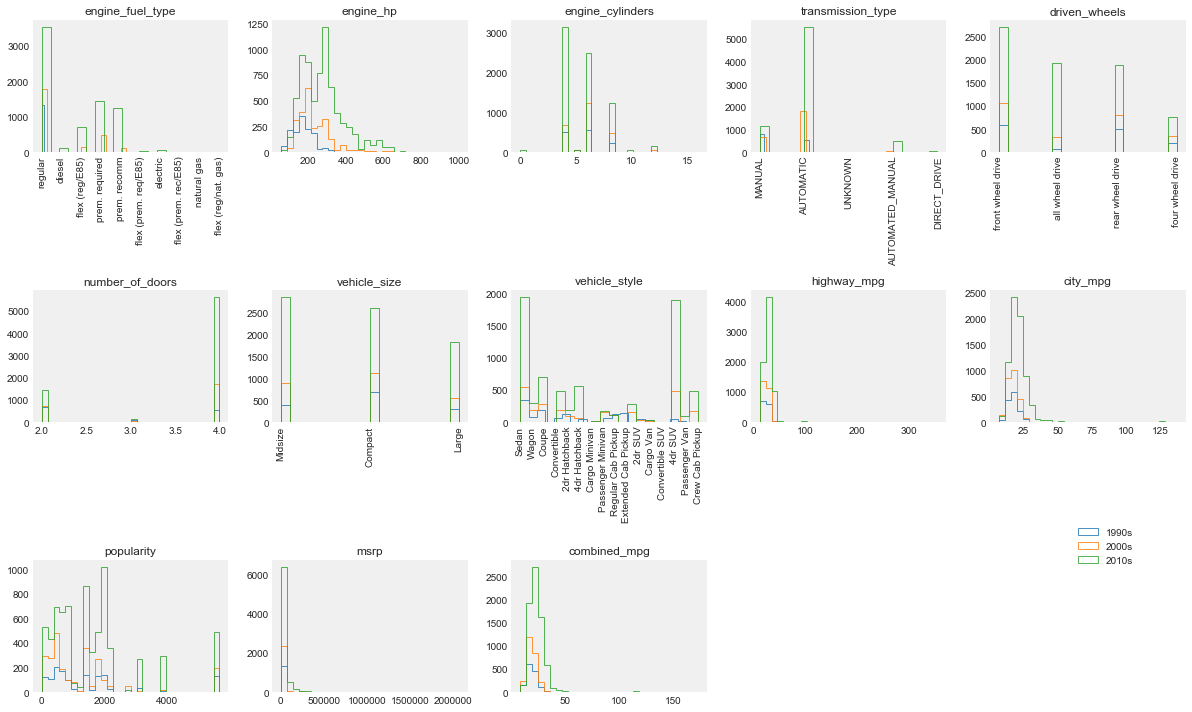

In [10]:
# print all histogram
n_col = 5

plot_columns = ['engine_fuel_type', 'engine_hp', 'engine_cylinders',
                'transmission_type', 'driven_wheels', 'number_of_doors', 'vehicle_size',
                'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'combined_mpg']

fig, ax = plt.subplots(nrows=len(plot_columns) // n_col + (len(plot_columns) % n_col > 0),
                       ncols=n_col, figsize=fig_size)
ax = ax.flatten()

axi = 0
for col in plot_columns:
    # create bin
    if not(data_display.loc[:, col].dtype == "O"):
        bins = np.histogram(data_display.loc[:, col].dropna(), bins=30)[1]
    else:
        # bins = data_display.loc[:, col].dropna().unique()
        bins = 20


    # show histogram
    ax[axi].hist(data_display.loc[data_display['decade'] == '1990s', col].dropna(),
                 histtype='step', bins=bins, alpha=0.8, label='1990s')
    ax[axi].hist(data_display.loc[data_display['decade'] == '2000s', col].dropna(),
                 histtype='step', bins=bins, alpha=0.8, label='2000s')
    ax[axi].hist(data_display.loc[data_display['decade'] == '2010s', col].dropna(),
                 histtype='step', bins=bins, alpha=0.8, label='2010s')

    # show as categorial for unique
    if data_display.loc[:, col].dtype == "O":
        ax[axi].set_xticks(data_display[col].dropna().unique())
        for tick_lab in ax[axi].get_xticklabels():
            tick_lab.set_rotation(90)

    # add title
    ax[axi].set_title(col)
    ax[axi].set_facecolor('#F0F0F0FF')

    axi += 1

for i in range(axi, len(ax)):
    ax[i].axis('off')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.9, 0.2))
fig.patch.set_alpha(0)

plt.tight_layout()

plt.savefig('hist.png', facecolor=fig.get_facecolor(), edgecolor='none')

### MPG Corelation

In [11]:
decade = '1990s'
subsets = data_display.loc[data_display['decade'] == decade, :]
corr = subsets.corrwith(subsets['combined_mpg'])
print('Attribute correlation with combined_mpg for vehicle from ' + decade)
corr.reindex(corr.abs().sort_values(ascending=False).index)

Attribute correlation with combined_mpg for vehicle from 1990s


combined_mpg        1.000000
highway_mpg         0.984210
city_mpg            0.982293
engine_cylinders   -0.704662
engine_hp          -0.650891
popularity         -0.200103
msrp               -0.190664
number_of_doors     0.033393
dtype: float64

In [12]:
decade = '2000s'
subsets = data_display.loc[data_display['decade'] == decade, :]
corr = subsets.corrwith(subsets['combined_mpg'])
print('Attribute correlation with combined_mpg for vehicle from ' + decade)
corr.reindex(corr.abs().sort_values(ascending=False).index)

Attribute correlation with combined_mpg for vehicle from 2000s


combined_mpg        1.000000
highway_mpg         0.978251
city_mpg            0.977914
engine_cylinders   -0.761746
engine_hp          -0.657530
msrp               -0.345262
popularity         -0.061342
number_of_doors     0.010548
dtype: float64

In [13]:
decade = '2010s'
subsets = data_display.loc[data_display['decade'] == decade, :]
corr = subsets.corrwith(subsets['combined_mpg'])
print('Attribute correlation with combined_mpg for vehicle from ' + decade)
corr.reindex(corr.abs().sort_values(ascending=False).index)

Attribute correlation with combined_mpg for vehicle from 2010s


combined_mpg        1.000000
city_mpg            0.977157
highway_mpg         0.960930
engine_cylinders   -0.633110
engine_hp          -0.568076
msrp               -0.236370
number_of_doors     0.104949
popularity         -0.012761
dtype: float64

In [14]:
decade = 'All'
subsets = data_display
corr = subsets.corrwith(subsets['combined_mpg'])
print('Attribute correlation with combined_mpg')
corr.reindex(corr.abs().sort_values(ascending=False).index)

Attribute correlation with combined_mpg


combined_mpg        1.000000
city_mpg            0.977288
highway_mpg         0.964310
engine_cylinders   -0.626114
engine_hp          -0.448882
msrp               -0.169065
number_of_doors     0.121592
popularity         -0.008166
dtype: float64

### Categorical effect on MPG improvement

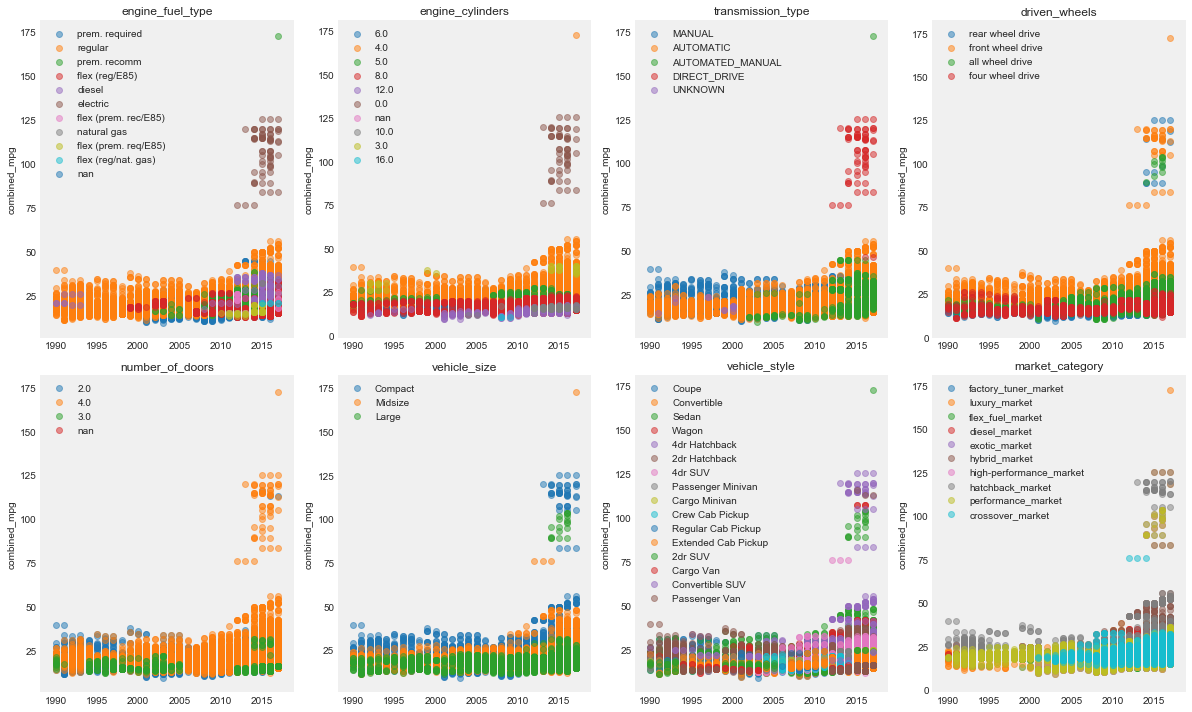

In [15]:
# print all histogram
data_display = car_data.loc[:, ['year', 'engine_fuel_type',
                                'engine_cylinders', 'transmission_type', 'driven_wheels',
                                'number_of_doors', 'vehicle_size', 'vehicle_style',
                                'combined_mpg']]

n_col = 4

plot_columns = ['engine_fuel_type', 'engine_cylinders', 'transmission_type',
                'driven_wheels', 'number_of_doors', 'vehicle_size', 'vehicle_style']

fig, ax = plt.subplots(nrows=len(plot_columns) // n_col + (len(plot_columns) % n_col > 0),
                       ncols=n_col, figsize=fig_size)
ax = ax.flatten()

axi = 0
for col in plot_columns:
    # show scatter
    for cat in data_display[col].unique():
        content = data_display.loc[data_display[col] == cat, ['year', 'combined_mpg']]

        ax[axi].scatter(content['year'], content['combined_mpg'], label=cat, alpha=0.5)

    # add title
    ax[axi].set_title(col)

    ax[axi].set_facecolor('#F0F0F0FF')
    ax[axi].legend()
    ax[axi].set_ylabel('combined_mpg')

    axi += 1

# Market Category
for col in ['factory_tuner_market', 'luxury_market', 'flex_fuel_market', 'diesel_market', 'exotic_market',
            'hybrid_market', 'high-performance_market', 'hatchback_market',
            'performance_market', 'crossover_market']:

    content = car_data.loc[car_data[col] == True, ['year', 'combined_mpg']]
    ax[axi].scatter(content['year'], content['combined_mpg'], label=col, alpha=0.5)

ax[axi].set_title('market_category')
ax[axi].set_facecolor('#F0F0F0FF')
ax[axi].legend()
ax[axi].set_ylabel('combined_mpg')


fig.patch.set_alpha(0)

plt.tight_layout()

plt.savefig('scat.png', facecolor=fig.get_facecolor(), edgecolor='none')

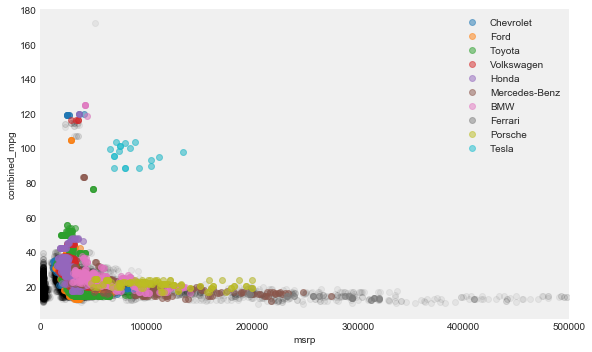

In [16]:
fig, ax = plt.subplots(figsize=(fig_size[0] / 2, fig_size[1] / 2))

# price vs mpg
ax.scatter(car_data['msrp'], car_data['combined_mpg'], c="k", alpha=0.05)

# Market Category
for col in ['Chevrolet', 'Ford', 'Toyota', 'Volkswagen',
            'Honda', 'Mercedes-Benz', 'BMW',
            'Ferrari', 'Porsche', 'Tesla']:

    content = car_data.loc[(car_data['make'] == col) & (car_data['decade'] == '2010s'),
                           ['msrp', 'combined_mpg']]
    ax.scatter(content['msrp'], content['combined_mpg'], label=col, alpha=0.5)

ax.set_facecolor('#F0F0F0FF')
ax.legend()
ax.set_xlabel('msrp')
ax.set_ylabel('combined_mpg')
ax.set_xlim(0, 500000)

fig.patch.set_alpha(0)

plt.tight_layout()

plt.savefig('price.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [17]:
# best combined mpg
car_data.loc[:, ['make', 'model', 'combined_mpg', 'engine_fuel_type', 'msrp']].\
    sort_values(by='combined_mpg', ascending=False).head()

,make,model,combined_mpg,engine_fuel_type,msrp
1119,Audi,A6,172.5,prem. recomm,51600
5790,BMW,i3,125.3,electric,42400
5791,BMW,i3,125.3,electric,42400
5792,BMW,i3,125.3,electric,42400
1983,Chevrolet,Bolt EV,119.9,electric,40905


In [18]:
# best combined mpg non full electric
car_data.loc[car_data['engine_fuel_type'] != 'electric', ['make', 'model', 'combined_mpg', 'engine_fuel_type', 'msrp']].\
    sort_values(by='combined_mpg', ascending=False).head()

,make,model,combined_mpg,engine_fuel_type,msrp
1119,Audi,A6,172.50,prem. recomm,51600
7701,Toyota,Prius,55.75,regular,24700
7708,Toyota,Prius,55.75,regular,25165
7677,Toyota,Prius Prime,54.10,regular,33100
7678,Toyota,Prius Prime,54.10,regular,28800
